# Condiciones de aceptabilidad de modelos con polítropa Maestra
## Espacio de parámetros

Este cuaderno muestra gráficamente el espacio de parámetros, en función del número de condiciones de aceptabilidad cumplidas, para esferas anisótropas relativistas con ecuación de estado polítropa maestra
\begin{equation}
    P = \kappa \rho^{1+\frac{1}{n}} + \alpha \rho - \beta \,.
\end{equation}
Para un valor del índice polítropo $n$ y un valor de $\varkappa \ \left(= \frac{\rho_b}{\rho_c}\right)$. El código solo funciona para $\varkappa$ igual a 0.05 o 0.2, e índice polítropo $n$ igual a 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5 o 4.0, debido a los datos necesarios para la evaluación de la condición **C7**.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D
import math
from scipy import integrate
from numpy import diff
from scipy.integrate import solve_ivp

In [2]:
plt.rc('text', usetex = True)
plt.rc('font', **{'family' : "sans-serif"})
params = {'text.latex.preamble' : [r'\usepackage{amssymb}']}
plt.rcParams.update(params)
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

# Modelado de objetos compactos

## Ecuaciones de estructura

Las ecuaciones de estructura son el resultado de manipular las ecuaciones de campo de Einstein para una métrica y un tensor de energía dado, y son las ecuaciones que hay que resolver para modelar objetos compactos. En el caso de configuraciones estáticas con simetría esférica y anisotropía en la presión, las ecuaciones de estructura consisten en

\begin{eqnarray}
P^{\prime} &=& - \left(\rho + P \right) \frac{m + 4 \pi r^{3} P}{r(r - 2m)} + \frac{2}{r} \left(P_{\perp} - P \right)  \label{EqHid} \tag{1} \\
m^{\prime} &=& 4 \pi r^{2} \rho \label{MasDif} \tag{2}
\end{eqnarray}
donde $\rho$ es densidad de energía, $m$ es masa, $P$ es presión radial, $P_{\perp}$ es presión tangencial y la prima denota derivada respecto a $r$.

## Ecuación de Estado

Una ecuación de estado (EoS por sus siglas en inglés) es un modelo matemático, entre variables de estado, que describe los procesos físicos más importantes que ocurren en un sistema termodinámico.

La EoS polítropa maestra consiste en una relación tal que
\begin{equation}
P = \kappa \rho^{1+\frac{1}{n}} + \alpha \rho - \beta \,. \label{PoliMaestra} \tag{3}
\end{equation}

Por otra parte, se supone que la anisotropía en a presión es de la forma
\begin{equation}
\Delta\equiv P_{\perp} - P = C r (\rho + P) \frac{m + 4 \pi r^3 P}{r(r-2m)} \,, \label{Anisotropia} \tag{4}
\end{equation}
tal que la ecuación (1) queda como
\begin{equation}
\frac{\mathrm{d}P}{\mathrm{d}r} = - h \frac{(\rho + P)(m + 4 \pi  r^3 P)}{r(r-2m)} \,, \label{EqHidCos} \tag{5}
\end{equation}
donde $h = 1 - 2C$, y $C$ cuantifica la anisotropía en el modelo.

## Ecuación de Lane-Emden

Las ecuaciones de estructura pueden escribirse de forma adimensional cuando son dotadas de EoS polítropas. El resultado es conocido como ecuación de Lane-Emden, dada por el cambio de variables
\begin{equation}
\Psi^{n}(\xi) = \frac{\rho}{\rho_{c}} \ , \ \ \eta \left(\xi \right) = \frac{m}{4 \pi \rho_c a^{3}} \quad \textrm{y} \quad r = a\xi \,,
\end{equation}
donde
\begin{equation}
a^{2} = \frac{\Upsilon \left(n + 1 \right)}{4 \pi \rho_c} \ , \ \ \Upsilon = \kappa \rho_{c}^{1/n} = \frac{\sigma - \alpha \left(1 - \varkappa \right)}{1 - \varkappa^{1 + \frac{1}{n}}} \ , \ \ \sigma = \frac{P_{c}}{\rho_{c}} \quad \textrm{y} \quad \varkappa = \frac{\rho_{b}}{\rho_{c}} \,.
\end{equation}
Los subíndices $c$ y $b$ indican que la variable es evaluada en el centro y borde de la configuración, respectivamente.

De esta manera, las EoS $\eqref{PoliMaestra}$ y $\eqref{Anisotropia}$ adimensionales son
\begin{eqnarray}
P &=& \rho_c \left\{\Upsilon \left( \Psi^{n+1} - \varkappa^{1 + \frac{1}{n}} \right) + \alpha \left(\Psi^{n} - \varkappa \right)\right\}  = \rho_c \mathcal{P} \quad \textrm{y} \label{PAdi} \tag{6} \\
\Delta &=& \frac{C \Upsilon (n+1) \left(\eta + \xi^{3} \mathcal{P} \right) \left(\Psi^{n} + \mathcal{P} \right) \rho_{c}}{\xi - 2  \Upsilon \left( n+1 \right) \eta} \,, \label{AniAdi} \tag{7}
\end{eqnarray}
respectivamente.


Finalmente, las ecuaciones $\eqref{EqHidCos}$ y $\eqref{MasDif}$, escritas en su forma adimensional, son
\begin{eqnarray}
\dot{\Psi} &=& - \frac{h \left(\eta + \xi^{3} \mathcal{P}\right) \left(1 + \frac{\mathcal{P}}{\Psi^{n}}\right)}{\xi \left\{\xi-2\,\Upsilon\,\left( n+1 \right) \eta\right\} \left\{1 + \frac{\alpha n}{\Upsilon \left(n+1\right) \Psi}\right\}}  \qquad \textrm{y} \label{PsiPunto} \tag{8} \\
\dot{\eta} &=& \xi^{2}\Psi^{n} \,, \label{EtaPunto} \tag{9}
\end{eqnarray}
donde el punto indica derivada respecto de $\xi$.

Por lo tanto, el sistema de ecuaciones a integrar numéricamente está dado por $\eqref{PsiPunto}$ y $\eqref{EtaPunto}$, con condiciones iniciales
\begin{equation}
\Psi (\xi = 0) = \Psi_{c} = 1 \,, \quad \eta (\xi = 0) = \eta_{c} = 0  \,,
\end{equation}
y con condición de frontera
\begin{equation}
\Psi (\xi = \xi_{b}) = 0 \,.
\end{equation}

In [3]:
# Definiendo sistema de ecuaciones: derivada de Psi y derivada de Eta en función de xi
def funciones(xi,y,alpha,n,h,Upsilon,varkappa):
    psi_,eta_ = y
    dydxi = [-h*(eta_ + xi**(3)*(Upsilon*(psi_**(n+1)-varkappa**(1+1/n)) + alpha*(psi_**(n) - varkappa)))*(1 + Upsilon*(psi_ - (varkappa**(1+1/n)/psi_**(n))) + alpha*(1 - (varkappa/psi_**(n))))/xi/(xi - 2*Upsilon*(n+1)*eta_) /(1 + alpha*n/Upsilon/(n+1)/psi_) 
             ,xi**(2)*psi_**(n)] 
    return dydxi

In [4]:
# Se definen los parámetros (de entrada) que caracterizan a cada modelo: n, C, alpha, varkappa, sigma

n = 0.5           # Índice polítropo n
print('n: ',n)

Lista_C = [0,1/32,1/16,3/32,1/8,5/32,3/16,7/32,1/4]   # Lista de valores para el factor de anisotropía C
print('Valores de C: ',end='')
print(*Lista_C, sep=', ')

Lista_alpha = [-0.1,-0.05,0.000001,0.05,0.099999]    # Lista de valores para el factor del término lineal
print('Valores de \u03b1: ',end='')
print(*Lista_alpha, sep=', ')

varkappa = 0.05                                     # Razón entre densidad en el borde y densidad central
print('\u03f0:',varkappa)
   
# Lista de sigmas    
Lista_sigma = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8]
print('Valores de \u03c3: ',end='')
print(*Lista_sigma, sep=', ')

# Número total de modelos evaluados
Numero_de_modelos = len(Lista_alpha)*len(Lista_C)*len(Lista_sigma)
print('Número de modelos: ', Numero_de_modelos)

n:  0.5
Valores de C: 0, 0.03125, 0.0625, 0.09375, 0.125, 0.15625, 0.1875, 0.21875, 0.25
Valores de α: -0.1, -0.05, 1e-06, 0.05, 0.099999
ϰ: 0.05
Valores de σ: 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8
Número de modelos:  720


In [5]:
%%time

ListaModelos = []                                        # Contenedor de todos los modelos

contador = 0

for i in range(len(Lista_alpha)):
    
    ListaModelos.append([])                              # Contenedor para alpha
    
    alpha = Lista_alpha[i]             # Factor del término lineal para cada modelo
    
    for j in range(len(Lista_C)):
        
        ListaModelos[i].append([])                       # Contenedor para C
        
        C = Lista_C[j]                # Factor de anisotropía para cada modelo
        h = 1 - 2*C
        
        for k in range(len(Lista_sigma)):
            
            ListaModelos[i][j].append([])                # Contenedor para sigma
            
            sigma = Lista_sigma[k]    # Sigma para cada modelo
            
            # Cálculo de Upsilon
            Upsilon = (sigma - alpha*(1 - varkappa))/(1 - varkappa**(1 + 1/n))
                                 
            # Condiciones iniciales
            Psi0 = 1.0
            Eta0 = 0.0
            y0 = [Psi0,Eta0]
            
            # Intervalo de integración
            xi0 = 10**(-15) # Inicio
            ximax = 100000    # Fin, en caso de que la condición para detener la integración no se cumpla
            xi_span = (xi0,ximax) # Espacio de integración
        
            # Condición para detener la integración (Presión adimensional menor que 10**(-15))
            def stop_condition(xi,y,alpha, n, h, Upsilon, varkappa):
                return (1/sigma)*(Upsilon*(y[0]**(n+1) - varkappa**(1 + 1/n)) + alpha*(y[0]**(n) - varkappa)) - 10**-15
            stop_condition.terminal = True
        
            # Solución del sistema de ecuaciones utilizando la rutina "solve_ivp" por medio del método RK45
            # solve_ivp(Ecuaciones a integrar, Espacio de integración, Condiciones iniciales, Método de integración,
            #           Condición para detener la integración)
            soluciones = solve_ivp(funciones,xi_span,y0,method='RK45',events=stop_condition,
                                   args=(alpha, n, h, Upsilon, varkappa))
            
            if soluciones.status != 0:
                xi = soluciones.t
                Psi = soluciones.y[0]
                Eta = soluciones.y[1]
            else:
                ListaModelos[i][j][k] = ('gray','X',5),alpha,C,sigma
                print('Modelo sin borde. Parámetros: ',f'C = {C}, n = {n},\u03c3 = {sigma},\u03f0 = {varkappa},\u03b1 = {alpha}')
                contador = contador + 1
                continue
                
            varP = Upsilon*(Psi**(n+1) - varkappa**(1 + 1/n)) + alpha*(Psi**(n) - varkappa) # Variable auxiliar
    
            # Derivada de Psi
            Psi1 = -h*(Eta+ xi**(3)*varP)*(1 + Upsilon*(Psi - (varkappa**(1 + 1/n)/Psi**(n))) + alpha*(1 - (varkappa/Psi**(n))))/xi/(xi - 2*Upsilon*(n+1)*Eta) /(1 + alpha*n/Upsilon/(n+1)/Psi)
                
            # Derivada de Eta
            Eta1 = xi**(2) * Psi**(n)
    
##########################################################################################################################
            
            # Xi normalizada
            xiNorm = xi/xi[-1]
            
        ### Condición C1
        
            compacidad = 2*Upsilon*(n+1)*Eta/xi
            
        ### Condición C2
            
            # Densidad de energía
            Densidad = Psi**(n)
            
            # Presión entre presión central
            PNorm = (1/sigma)*varP
            
            # Presión tangencial entre presión central
            PTNorm = C*Upsilon*(n+1)*(Eta + xi**(3)*varP)*(Psi**(n) + varP)/sigma/(xi - 2*Upsilon*(n+1)*Eta) + varP/sigma
            
            C2 = [Densidad, PNorm, PTNorm]
        
        ### Condición C3
        
            # Gradiente de densidad
            Dprima = n*Psi**(n-1)*Psi1   
            
            # Gradiente de presión radial
            Pprima = (1/sigma)*Upsilon*(n+1)*Psi**(n)*Psi1*(1 + alpha*n/(n+1)/Upsilon/Psi)
            
            # Gradiente de presión tangencial
            Ptprima = (1/sigma)*(C*Upsilon*(n+1)*(((Eta1 + 3*xi**(2)*varP + xi**(3)*Upsilon*(n+1)*Psi**(n)*Psi1*(1 + alpha*n/Upsilon/(n+1)/Psi))*(Psi**(n) + varP) + (Eta + xi**(3)*varP)*(n*Psi**(n-1)*Psi1 + Upsilon*(n+1)*Psi**(n)*Psi1*(1 + alpha*n/Upsilon/(n+1)/Psi)))/(xi - 2*Upsilon*(n+1)*Eta) - (Eta + xi**(3)*varP)*(Psi**(n) + varP)*(1 - 2*Upsilon*(n+1)*Eta1)/(xi - 2*Upsilon*(n+1)*Eta)**(2)) + Upsilon*(n+1)*Psi**(n)*Psi1*(1 + alpha*n/Upsilon/(n+1)/Psi))
        
            C3 = [Dprima,Pprima,Ptprima]
    
        ### Condición C4
        
            # Condición sobre la traza (TEC)     
            TEC = (1/sigma)*Densidad - PNorm - 2*PTNorm
            
        ### Condición C5
        
            # Velocidad del sonido radial al cuadrado
            v2r = Upsilon*(1 + 1/n)*Psi + alpha # Velocidad del sonido al cuadrado
            
            # Diferencia de las velocidades del sonido al cuadrado
            vDelta2 = (C*Upsilon*(n+1)/(xi - 2*Upsilon*(n+1)*Eta))*((1 + Upsilon*(n+1)*Psi/n + alpha)*(Eta + xi**(3)*varP) + (Psi**(n) + varP)*xi**(2)*Psi*((Psi**(n) + 3*varP)/n/Psi**(n)/Psi1 + (xi/Psi)*((Upsilon*(n+1)*Psi)/n + alpha)) - Psi*(Psi**(n) + varP)*(Eta + xi**(3)*varP)*(1 - 2*Upsilon*(n+1)*xi**(2)*Psi**(n))/(n*Psi**(n)*Psi1*(xi - 2*Upsilon*(n+1)*Eta)))
            
            # Velocidad del sonido tangencial al cuadrado
            v2t = vDelta2 + v2r
            
            C5 = [v2r, v2t]
            
        ### Condición C6
        
            # Índice adiabático Gamma
            Gamma = v2r*(Densidad + sigma*PNorm)/PNorm/sigma
            
        ### Condición C8
        
            # Segunda derivada de Psi
            Psi11 = -(h/xi/(xi - 2*Upsilon*(n+1)*Eta)/(1 + alpha*n/Upsilon/(n+1)/Psi))*((Eta1 + 3*xi**(2)*varP + xi**(3)*(n+1)*Upsilon*Psi**(n)*Psi1*(1 + alpha*n/Upsilon/(n+1)/Psi))*(1 + Upsilon*(Psi - varkappa**(1 + 1/n)/Psi**(n)) + alpha*(1 - varkappa/Psi**(n))) + (Eta + xi**(3)*(Upsilon*(Psi**(n+1) - varkappa**(1+ 1/n)) + alpha*(Psi**(n) - varkappa)))*((n+1)*Upsilon*Psi1*(1 + alpha*n/Upsilon/(n+1)/Psi) - n*varP*Psi1/Psi**(n+1)) + (Eta + xi**(3)*varP)*(1 + Upsilon*(Psi - varkappa**(1 + 1/n)/Psi**(n)) + alpha*(1 - varkappa/Psi**(n)))*((2*Upsilon*(n+1)*Eta1 - 1)/(xi - 2*Upsilon*(n+1)*Eta) + alpha*n*Psi1/(1 + alpha*n/Upsilon/(n+1)/Psi)/Upsilon/(n+1)/Psi**(2) - 1/xi))
        
            # Fracturas: deltaR1: Densidad, deltaR2: Masa, deltaR3: Presión, delta R4: Gradiente de presión   
            deltaR1 = h*Upsilon*(n+1)*(Eta + xi**(3)*varP)/xi/(xi - 2*Upsilon*(n+1)*Eta)
            deltaR2 = h*Upsilon*(n+1)*xi**(2)*Psi*(Psi**(n) + varP)*(1 + 2*Upsilon*(n+1)*varP*xi**(2))/n/Psi1/(xi - 2*Upsilon*(n+1)*Eta)**(2)
            deltaR3 = h*Upsilon*(n+1)*(Eta + xi**(3)*(Psi**(n) + 2*(Upsilon*(Psi**(n+1) - varkappa**(1+1/n)) + alpha*(Psi**(n) - varkappa))))*(Upsilon*(n+1)*Psi/n + alpha)/(xi*(xi - 2*Upsilon*(n+1)*Eta))
            deltaR4 = Upsilon*(n+1)*(n*Psi1**(2) + Psi*Psi11)/n/Psi1 + alpha*((n-1)*Psi1**(2) + Psi*Psi11)/Psi/Psi1
            
            deltaRMaster = deltaR1 + deltaR2 + deltaR3 + deltaR4

        ### Condición C9
            
            # Flotabilidad
            Psin11 = n*(Psi**(n-1)*Psi11 + (n-1)*Psi**(n-2)*Psi1**(2))
            
############################################################################################################################
            
            # C1
            
            if any(compacidad >= 1):
                ListaModelos[i][j][k].append(1)
            else:
                pass
            
            # C2
            
            if any(Densidad < 0) or any(PNorm < 0) or any(PTNorm < 0):
                ListaModelos[i][j][k].append(1)
            else:
                pass
            
            # C3
            
            if any(Dprima > 0) or any (Pprima > 0) or any (Ptprima[5:] > 0):
                ListaModelos[i][j][k].append(1)
            else:
                pass
            
            # C4
            
            if any(TEC < 0):
                ListaModelos[i][j][k].append(1)
            else:
                pass
            
            # C5
            
            if any(Gamma < 4/3):
                ListaModelos[i][j][k].append(1)
            else:
                pass
            
            # C6
            
            if any(v2r > 1) or any(v2t > 1):
                ListaModelos[i][j][k].append(1)
            else:
                pass
            
###############################################################################  

            # C7. Datos obtenidos de <<Polítropa Maestra - H-Z-N - Gráfica>>
            
            if varkappa == 0.05 :
                
                if n == 0.5 :
                    
                    if C == 0.0 :
                        
                        if alpha == -0.1 or alpha == -0.05 or alpha == 0.000001 or alpha == 0.05 : pass
                        
                        elif alpha == 0.099999 and (sigma < 0.3 or sigma > 0.6 ) : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.03125 :
                        
                        if alpha == -0.1 or alpha == -0.05 or alpha == 0.000001 or alpha == 0.05 : pass
                        
                        elif alpha == 0.099999 and (sigma < 0.35 or sigma > 0.45 ) : ListaModelos[i][j][k].append(1)
                        
                        else : pass
                                
                    elif C == 0.0625 :
                        
                        if alpha == -0.1 or alpha == -0.05 or alpha == 0.000001 : pass
                        
                        elif alpha == 0.05 and sigma > 0.775 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                    
                    elif C == 0.09375 :
                        
                        if alpha == -0.1 or alpha == -0.05 or alpha == 0.000001 : pass
                        
                        elif alpha == 0.05 and sigma > 0.675 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.125 :
                        
                        if alpha == -0.1 or alpha == -0.05 : pass
                        
                        elif alpha == 0.000001 and sigma > 0.775 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 and sigma > 0.6 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.15625 :
                        
                        if alpha == -0.1 : pass
                        
                        elif alpha == -0.05 and sigma > 0.8 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.675 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 and sigma > 0.5 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.1875 :
                        
                        if alpha == -0.1 and sigma > 0.775 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.7 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.6 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 and sigma > 0.425 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.21875 :
                        
                        if alpha == -0.1 and sigma > 0.675 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.6 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.5 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 and (sigma < 0.1 or sigma > 0.35 ) : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.25 :
                        
                        if alpha == -0.1 and sigma > 0.575 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.5 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.425 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 and (sigma < 0.1 or sigma > 0.25) : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                    
                    else : pass
                        
                elif n == 1.0 :
                    
                    if C == 0.0 :
                        
                        if alpha == -0.1 and sigma > 0.625 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.525 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.4 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.03125 :
                        
                        if alpha == -0.1 and sigma > 0.575 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.475 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.35 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.0625 :
                        
                        if alpha == -0.1 and sigma > 0.55 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.45 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.325 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.09375 :
                        
                        if alpha == -0.1 and sigma > 0.5 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.425 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.3 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.125 :
                        
                        if alpha == -0.1 and sigma > 0.45 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.375 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.275 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.15625 :
                        
                        if alpha == -0.1 and sigma > 0.425 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.35 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.25 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.1875 :
                        
                        if alpha == -0.1 and sigma > 0.375 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.325 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.225 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.21875 :
                        
                        if alpha == -0.1 and sigma > 0.35 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.275 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.2 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.25 :
                        
                        if alpha == -0.1 and sigma > 0.3 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.25 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.175 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    else : pass
                        
                elif n == 1.5 :
                    
                    if C == 0.0 :
                        
                        if alpha == -0.1 and sigma > 0.375 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.275 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.175 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.03125 :
                        
                        if alpha == -0.1 and sigma > 0.35 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.275 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.15 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.0625 :
                        
                        if alpha == -0.1 and sigma > 0.325 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.25 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.15 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.09375 :
                        
                        if alpha == -0.1 and sigma > 0.3 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.25 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.15 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.125 :
                        
                        if alpha == -0.1 and sigma > 0.3 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.225 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.125 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.15625 :
                        
                        if alpha == -0.1 and sigma > 0.275 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.2 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.125 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.1875 :
                        
                        if alpha == -0.1 and sigma > 0.25 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.2 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.21875 :
                        
                        if alpha == -0.1 and sigma > 0.225 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.175 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.25 :
                        
                        if alpha == -0.1 and sigma > 0.2 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.15 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    else : pass
                        
                elif n == 2.0 :
                    
                    if C == 0.0 :
                        
                        if alpha == -0.1 and sigma > 0.25 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.175 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.03125 :
                        
                        if alpha == -0.1 and sigma > 0.225 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.175 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.0625 :
                        
                        if alpha == -0.1 and sigma > 0.225 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.175 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.09375 :
                        
                        if alpha == -0.1 and sigma > 0.225 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.15 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.125 :
                        
                        if alpha == -0.1 and sigma > 0.2 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.15 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.15625 :
                        
                        if alpha == -0.1 and sigma > 0.2 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.15 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.1875 :
                        
                        if alpha == -0.1 and sigma > 0.175 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.125 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.21875 :
                        
                        if alpha == -0.1 and sigma > 0.175 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.125 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.25 :
                        
                        if alpha == -0.1 and sigma > 0.15 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    else : pass
                        
                elif n == 2.5 :
                    
                    if C == 0.0 :
                        
                        if alpha == -0.1 and sigma > 0.175 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.125 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.03125 :
                        
                        if alpha == -0.1 and sigma > 0.175 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.125 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.0625 :
                        
                        if alpha == -0.1 and sigma > 0.175 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.125 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.09375 :
                        
                        if alpha == -0.1 and sigma > 0.15 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.125 :
                        
                        if alpha == -0.1 and sigma > 0.15 : ListaModelos[i][j][k].append(1)
                            
                        elif alpha == -0.05 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                    
                    elif C == 0.15625 :
                        
                        if alpha == -0.1 and sigma > 0.15 : ListaModelos[i][j][k].append(1)
                            
                        elif alpha == -0.05 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.1875 :
                        
                        if alpha == -0.1 and sigma > 0.15 : ListaModelos[i][j][k].append(1)
                            
                        elif alpha == -0.05 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.21875 :
                        
                        if alpha == -0.1 and sigma > 0.125 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.25 :
                        
                        if alpha == -0.1 and sigma > 0.125 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    else : pass
                        
                elif n == 3.0 :
                
                    if C == 0.0 :
                        
                        if alpha == -0.1 and sigma > 0.15 : ListaModelos[i][j][k].append(1)
                            
                        elif alpha == -0.05 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.03125 :
                        
                        if alpha == -0.1 and sigma > 0.125 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.0625 :
                        
                        if alpha == -0.1 and sigma > 0.125 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.09375 :
                        
                        if alpha == -0.1 and sigma > 0.125 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.125 :
                        
                        if alpha == -0.1 and sigma > 0.125 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.15625 :
                        
                        if alpha == -0.1 and sigma > 0.125 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.1875 :
                        
                        if alpha == -0.1 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.21875 :
                        
                        if alpha == -0.1 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.25 :
                        
                        if alpha == -0.1 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    else : pass
                    
                elif n == 3.5 :
                    
                    if C == 0.0 :
                        
                        if alpha == -0.1 and sigma > 0.125 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.03125 :
                        
                        if alpha == -0.1 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.0625 :
                        
                        if alpha == -0.1 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.09375 :
                        
                        if alpha == -0.1 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.125 :
                        
                        if alpha == -0.1 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.15625 :
                        
                        if alpha == -0.1 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.1875 :
                        
                        if alpha == -0.1 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.21875 :
                        
                        if alpha == -0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.25 :
                        
                        if alpha == -0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    else : pass
                        
                elif n == 4.0 :
                    
                    if C == 0.0 :
                        
                        if alpha == -0.1 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.03125 :
                        
                        if alpha == -0.1 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.0625 :
                        
                        if alpha == -0.1 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.09375 :
                        
                        if alpha == -0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.125 :
                        
                        if alpha == -0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.15625 :
                        
                        if alpha == -0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.1875 :
                        
                        if alpha == -0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.21875 :
                        
                        if alpha == -0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.25 :
                        
                        if alpha == -0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    else : pass
                
                else : pass           
            
            elif varkappa == 0.2:
                
                if n == 0.5 :
                    
                    if C == 0.0 :
                        
                        if alpha == -0.1 or alpha == -0.05 or alpha == 0.000001 or alpha == 0.05 : pass
                        
                        elif alpha == 0.099999 and sigma < 0.1 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.03125 :
                        
                        if alpha == -0.1 or alpha == -0.05 or alpha == 0.000001 or alpha == 0.05 : pass
                        
                        elif alpha == 0.099999 and (sigma < 0.1 or sigma > 0.775 ) : ListaModelos[i][j][k].append(1)
                        
                        else : pass
                            
                    elif C == 0.0625 :
                        
                        if alpha == -0.1 or alpha == -0.05 or alpha == 0.000001 : pass
                        
                        elif alpha == 0.05 and sigma > 0.825 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 and (sigma < 0.1 or sigma > 0.675 ) : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.09375 :
                        
                        if alpha == -0.1 or alpha == -0.05 : pass
                        
                        elif alpha == 0.000001 and sigma > 0.85 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 and sigma > 0.75 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 and (sigma < 0.125 or sigma > 0.6 ) : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.125 :
                        
                        if alpha == -0.1 or alpha == -0.05 : pass
                        
                        elif alpha == 0.000001 and sigma > 0.775 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 and sigma > 0.65 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 and (sigma < 0.125 or sigma > 0.525 ) : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.15625 :
                        
                        if alpha == -0.1 and sigma > 0.85 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.75 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.675 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 and sigma > 0.575 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 and (sigma < 0.125 or sigma > 0.425 ) : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.1875 :
                        
                        if alpha == -0.1 and sigma > 0.725 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.675 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.575 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 and sigma > 0.475 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 and (sigma < 0.125 or sigma > 0.35 ) : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.21875 :
                        
                        if alpha == -0.1 and sigma > 0.625 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.575 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.5 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 and sigma > 0.4 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 and (sigma < 0.15 or sigma > 0.25 ) : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.25 :
                        
                        if alpha == -0.1 and sigma > 0.55 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.475 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.425 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 and sigma > 0.325 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    else : pass
                        
                elif n == 1.0 :
                    
                    if C == 0.0 :
                        
                        if alpha == -0.1 and sigma > 0.525 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.45 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.375 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 and sigma > 0.25 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.03125 :
                        
                        if alpha == -0.1 and sigma > 0.525 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.425 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.35 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 and sigma > 0.25 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                            
                    elif C == 0.0625 :
                        
                        if alpha == -0.1 and sigma > 0.475 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.4 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.325 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 and sigma > 0.225 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.09375 :
                        
                        if alpha == -0.1 and sigma > 0.425 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.375 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.3 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 and sigma > 0.175 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.125 :
                        
                        if alpha == -0.1 and sigma > 0.4 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.35 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.275 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 and sigma > 0.15 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.15625 :
                        
                        if alpha == -0.1 and sigma > 0.375 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.325 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.25 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.1875 :
                        
                        if alpha == -0.1 and sigma > 0.35 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.3 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.225 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.21875 :
                        
                        if alpha == -0.1 and sigma > 0.3 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.25 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.2 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.25 :
                        
                        if alpha == -0.1 and sigma > 0.275 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.225 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.175 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    else : pass
                        
                elif n == 1.5 :
                    
                    if C == 0.0 :
                        
                        if alpha == -0.1 and sigma > 0.3 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.25 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.175 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.03125 :
                        
                        if alpha == -0.1 and sigma > 0.275 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.225 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.15 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                            
                    elif C == 0.0625 :
                        
                        if alpha == -0.1 and sigma > 0.275 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.225 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.15 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.09375 :
                        
                        if alpha == -0.1 and sigma > 0.25 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.2 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.15 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.125 :
                        
                        if alpha == -0.1 and sigma > 0.25 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.2 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.125 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.15625 :
                        
                        if alpha == -0.1 and sigma > 0.225 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.175 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.125 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.1875 :
                        
                        if alpha == -0.1 and sigma > 0.2 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.175 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.21875 :
                        
                        if alpha == -0.1 and sigma > 0.2 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.15 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.25 :
                        
                        if alpha == -0.1 and sigma > 0.175 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.15 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    else : pass
                        
                elif n == 2.0 :
                    
                    if C == 0.0 :
                        
                        if alpha == -0.1 and sigma > 0.2 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.15 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.03125 :
                        
                        if alpha == -0.1 and sigma > 0.2 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.15 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                            
                    elif C == 0.0625 :
                        
                        if alpha == -0.1 and sigma > 0.175 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.15 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.09375 :
                        
                        if alpha == -0.1 and sigma > 0.175 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.125 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.125 :
                        
                        if alpha == -0.1 and sigma > 0.175 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.125 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.15625 :
                        
                        if alpha == -0.1 and sigma > 0.15 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.125 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.1875 :
                        
                        if alpha == -0.1 and sigma > 0.15 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.21875 :
                        
                        if alpha == -0.1 and sigma > 0.15 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.25 :
                        
                        if alpha == -0.1 and sigma > 0.125 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    else : pass
                        
                elif n == 2.5 :
                    
                    if C == 0.0 :
                        
                        if alpha == -0.1 and sigma > 0.15 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.03125 :
                        
                        if alpha == -0.1 and sigma > 0.15 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                            
                    elif C == 0.0625 :
                        
                        if alpha == -0.1 and sigma > 0.125 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.09375 :
                        
                        if alpha == -0.1 and sigma > 0.125 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.125 :
                        
                        if alpha == -0.1 and sigma > 0.125 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.15625 :
                        
                        if alpha == -0.1 and sigma > 0.125 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.1875 :
                        
                        if alpha == -0.1 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.21875 :
                        
                        if alpha == -0.1 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.25 :
                        
                        if alpha == -0.1 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    else : pass
                        
                elif n == 3.0 :
                
                    if C == 0.0 :
                        
                        if alpha == -0.1 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.03125 :
                        
                        if alpha == -0.1 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                            
                    elif C == 0.0625 :
                        
                        if alpha == -0.1 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.09375 :
                        
                        if alpha == -0.1 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.125 :
                        
                        if alpha == -0.1 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.15625 :
                        
                        if alpha == -0.1 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.1875 :
                        
                        if alpha == -0.1 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.21875 :
                        
                        if alpha == -0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.25 :
                        
                        if alpha == -0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    else : pass
                    
                elif n == 3.5 :
                    
                    if C == 0.0 :
                        
                        if alpha == -0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.03125 :
                        
                        if alpha == -0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                            
                    elif C == 0.0625 :
                        
                        if alpha == -0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.09375 :
                        
                        if alpha == -0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.125 :
                        
                        if alpha == -0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.15625 :
                        
                        if alpha == -0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.1875 :
                        
                        if alpha == -0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.21875 :
                        
                        if alpha == -0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.25 :
                        
                        if alpha == -0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    else : pass
                        
                elif n == 4.0 :
                    
                    if C == 0.0 :
                        
                        if alpha == -0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.03125 :
                        
                        if alpha == -0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                            
                    elif C == 0.0625 :
                        
                        if alpha == -0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.09375 :
                        
                        if alpha == -0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.125 :
                        
                        if alpha == -0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.15625 :
                        
                        if alpha == -0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.1875 :
                        
                        if alpha == -0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.21875 :
                        
                        if alpha == -0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.25 :
                        
                        if alpha == -0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    else : pass
                
                else : pass
                
            else : pass
            
############################################################################################################################

            # C8
           
            if any(np.diff(np.sign(deltaRMaster[1:])) != 0):
                ListaModelos[i][j][k].append(1)
            else:
                pass

            # C9
            
            if any(Psin11 > 0):
                ListaModelos[i][j][k].append(1)
            else:
                pass 
            
            ListaModelos[i][j][k] = (('red','o',5) if len(ListaModelos[i][j][k]) == 0
                                     else ('blue','o',5) if len(ListaModelos[i][j][k]) == 1
                                     else ('green','o',5) if len(ListaModelos[i][j][k]) == 2
                                     else ('darkorange','o',5) if len(ListaModelos[i][j][k]) == 3
                                     else ('purple','o',5) if len(ListaModelos[i][j][k]) == 4
                                     else ('white','o',0)),C,n,sigma

C:\Users\DANIEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
C:\Users\DANIEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


Wall time: 24.1 s


In [6]:
print(contador, ' de', Numero_de_modelos, ' No tienen borde')

0  de 720  No tienen borde


In [7]:
legend_elements = [Line2D([0],[0],marker='o',color='w',label='9',markerfacecolor='red',markersize=5),
                   Line2D([0],[0],marker='o',color='w',label='8',markerfacecolor='blue',markersize=5),
                   Line2D([0],[0],marker='o',color='w',label='7',markerfacecolor='green',markersize=5),
                   Line2D([0],[0],marker='o',color='w',label='6',markerfacecolor='darkorange',markersize=5),
                   Line2D([0],[0],marker='o',color='w',label='5',markerfacecolor='purple',markersize=5)]

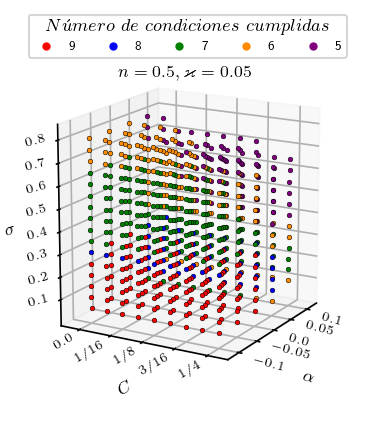

In [8]:
fig = plt.figure(figsize=(6,9),dpi=150)
fig.suptitle(r'$n = {}, \varkappa = {}$'.format(n,varkappa),x=0.31,y=0.86,fontsize=8,zorder=7)

ax1 = fig.add_subplot(321, projection='3d',zorder=3)

for i in range(len(Lista_alpha)):
        
    for j in range(len(Lista_C)):
                
        for k in range(len(Lista_sigma)):
            
            ax1.scatter(Lista_alpha[i],Lista_C[j],Lista_sigma[k],c=ListaModelos[i][j][k][0][0],marker=ListaModelos[i][j][k][0][1],
                        s=ListaModelos[i][j][k][0][2],edgecolors='k',linewidths=0.25)

ax1.xaxis.set_rotate_label(False)
ax1.yaxis.set_rotate_label(False)
ax1.zaxis.set_rotate_label(False)
ax1.set_xlabel(r'$\alpha$',fontsize=8,labelpad=-3.0,rotation=-15)
ax1.set_ylabel(r'$C$',fontsize=8,labelpad=-5.5,rotation=30)
ax1.set_zlabel(r'$\sigma$',fontsize=8,labelpad=-5,rotation=15)
ax1.set_xticks([-0.1,-0.05,0.0,0.05,0.1])
ax1.set_yticks([0,1/16,1/8,3/16,1/4])
ax1.set_zticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])
ax1.grid(b=True,)
ax1.set_xbound(-0.125,0.125)
ax1.set_ybound(-1/32,9/32)
ax1.set_zbound(0.0,0.85)
ax1.tick_params(axis='x',pad=-1,labelsize=8,labelrotation=-15)
ax1.tick_params(axis='y',pad=-4,labelsize=8,labelrotation=30)
ax1.tick_params(axis='z',pad=3,labelsize=8,labelrotation=15)
ax1.set_xticklabels([r'$-0.1$',r'$-0.05$',r'$0.0$',r'$0.05$',r'$0.1$'],ha='left',va='bottom',fontsize=6)
ax1.set_yticklabels([r'$0.0$',r'$1/16$',r'$1/8$',r'$3/16$',r'$1/4$'],ha='right',va='baseline',fontsize=6)
ax1.set_zticklabels([r'$0.1$',r'$0.2$',r'$0.3$',r'$0.4$',r'$0.5$',r'$0.6$',r'$0.7$',r'$0.8$'],ha='left',va='baseline',fontsize=6)
ax1.view_init(elev=-165, azim=150)
ax1.invert_xaxis()
ax1.invert_yaxis()
ax1.invert_zaxis()
ax1.set_zbound(0.0,0.85)

Legend = ax1.legend(handles=legend_elements,title=r'$N\acute{u}mero\ de\ condiciones\ cumplidas$',
                     ncol=5,loc=(0.03,0.95),fontsize=6)
plt.setp(Legend.get_title(),fontsize='small')

fig.subplots_adjust(wspace=0.075,hspace=-0.1)
plt.show()